In [151]:
#notes
#remove BYEs
#calculate playoff bracket
#distinguish Playoffs from consolation bracket points
#Magic Numbers:
#year
#last week of regular season
#make sure it stops at appropriate week if in middle of season
#----------------------------------------------------------------
#standings graph
#playoff percentage graph
#games above or below .500
#"true" standings - (games behind and points difference)
#week by week points scored
# what happens at end of season; or if season goes into next year

In [1]:
import requests
import json
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
  

current_year = date.today().year
league_id = 641199
year = 2021
num_reg_season_wks = 13 if year<2021 else 14

if(year < current_year):
    url = "https://fantasy.espn.com/apis/v3/games/ffl/leagueHistory/" + \
      str(league_id) + "?seasonId=" + str(year)
else:
    url = "https://fantasy.espn.com/apis/v3/games/ffl/seasons/" + str(year) + "/segments/0/leagues/" + str(league_id)


espn2_cookie = "AEAxEeNKrB88Vp%2FpTId5L7gZR6msXtExYPnpimar0j9jiEy5N1tEyWbRFMEyLMx7CrbRswiETXU1rI7CCHOrjLskyOIDdkJyD%2BolbOsW8BsZb3Ej9t5%2BoQ4hXkMZ3n%2FxcFhQuLt3ZHqwxUWA52VYtSZ91UPr5xUS%2BiB47vgiX41KFWKVrCIFZg286Kqot8kkkbW270WrWpyuA5CiaTo86QfHqGnLA1ZQh9TqrDJP9SBhrHtPpbg9cCbczXj8Faw7ww6tluoT8GVxPCOmLTzICmI2"    
swid_cookie = "{3845AF95-060B-4A9B-9E60-F16218937970}"    
r = requests.get(url, cookies={"swid": swid_cookie,
                          "espn_s2": espn2_cookie}, params={"view": "mMatchup"})

r2 = requests.get(url, cookies={"swid": swid_cookie,
                          "espn_s2": espn2_cookie})

if(year<current_year):
    d = r.json()[0]
    league_info = r2.json()[0]
#    with open('data.json', 'w') as f:
#       json.dump(league_info, f)
else:
    d = r.json()
    league_info = r2.json()
    
    
#fill in bye week opponents
for game in d['schedule']:
    if not 'away' in game:
        game['away'] = {'teamId': 'BYE', 'totalPoints': 0}
        
league_df = [[
        team['id'], (team['location'] + " " + team['nickname'])
    ] for team in league_info['teams']]

league_df = pd.DataFrame(league_df, columns=['ID', 'name'])
league_df = league_df.astype({"ID": str})



matchup_df = [[
        game['matchupPeriodId'],
        game['home']['teamId'], game['home']['totalPoints'],
        game['away']['teamId'], game['away']['totalPoints']
    ] for game in d['schedule']]
matchup_df = pd.DataFrame(matchup_df, columns=['Week', 'Team1', 'Score1', 'Team2', 'Score2'])
matchup_df['Type'] = ['Regular' if w<=num_reg_season_wks else 'Playoff' for w in matchup_df['Week']]
matchup_df = matchup_df.astype({"Team1": str})
matchup_df = matchup_df.astype({"Team2": str})
matchup_df.head()


,Week,Team1,Score1,Team2,Score2,Type
0,1,1,120.65,3,133.75,Regular
1,1,2,92.85,10,120.05,Regular
2,1,5,93.70,9,117.25,Regular
3,1,12,115.40,13,134.10,Regular
4,1,7,101.95,11,129.85,Regular


In [2]:
league_df.head()

,ID,name
0,1,The Commish
1,2,Show Me Your TDs
2,3,Mack and Cheese
3,5,Terry Loves Touchdowns
4,7,The Capt. Camel


In [3]:
#show team names
matchup_df['Team1Name'] =  matchup_df['Team1'].map(league_df.set_index('ID')['name'])
matchup_df['Team2Name'] =  matchup_df['Team2'].map(league_df.set_index('ID')['name'])
matchup_df.head()

,Week,Team1,Score1,Team2,Score2,Type,Team1Name,Team2Name
0,1,1,120.65,3,133.75,Regular,The Commish,Mack and Cheese
1,1,2,92.85,10,120.05,Regular,Show Me Your TDs,Team Messina
2,1,5,93.70,9,117.25,Regular,Terry Loves Touchdowns,The McGrath Football Team
3,1,12,115.40,13,134.10,Regular,FEED ZEKE,Cuttys Buddies
4,1,7,101.95,11,129.85,Regular,The Capt. Camel,Team Grygo


In [4]:
matchup_df

,Week,Team1,Score1,Team2,Score2,Type,Team1Name,Team2Name
0,1,1,120.65,3,133.75,Regular,The Commish,Mack and Cheese
1,1,2,92.85,10,120.05,Regular,Show Me Your TDs,Team Messina
2,1,5,93.70,9,117.25,Regular,Terry Loves Touchdowns,The McGrath Football Team
3,1,12,115.40,13,134.10,Regular,FEED ZEKE,Cuttys Buddies
4,1,7,101.95,11,129.85,Regular,The Capt. Camel,Team Grygo
...,...,...,...,...,...,...,...,...
65,14,3,0.00,11,0.00,Regular,Mack and Cheese,Team Grygo
66,14,7,0.00,13,0.00,Regular,The Capt. Camel,Cuttys Buddies
67,14,12,0.00,9,0.00,Regular,FEED ZEKE,The McGrath Football Team
68,14,5,0.00,10,0.00,Regular,Terry Loves Touchdowns,Team Messina


In [5]:
file_name = str(league_id) + '-' + str(year) + '-mu.csv'
matchup_df.to_csv("C:\\Users\\sando\\Documents\\python_projects\\ff\\" + file_name, index=False)

In [6]:
total_team1 = matchup_df[matchup_df['Team1']=='1'].sum()['Score1']
print(total_team1)

584.45


In [7]:
league_df['Total Points'] = ""
league_df['Total Playoff Points'] = ""
for id in league_df['ID']:
    team_total = matchup_df[(matchup_df['Team1']==id) & (matchup_df['Type']=='Regular')].sum()['Score1'] + matchup_df[(matchup_df['Team2']==id) & (matchup_df['Type']=='Regular')].sum()['Score2']
    playoff_team_total = matchup_df[(matchup_df['Team1']==id) & (matchup_df['Type']=='Playoff')].sum()['Score1'] + matchup_df[(matchup_df['Team2']==id) & (matchup_df['Type']=='Playoff')].sum()['Score2']
    print(team_total)
    league_df.loc[league_df['ID']==id, ['Total Points']] = team_total
    league_df.loc[league_df['ID']==id, ['Total Playoff Points']] = playoff_team_total

989.5
1077.6
967.2
1019.3
973.8499999999999
1120.8500000000001
962.8
967.4
1124.35
984.9000000000001


In [8]:
league_df

,ID,name,Total Points,Total Playoff Points
0,1,The Commish,989.5,0
1,2,Show Me Your TDs,1077.6,0
2,3,Mack and Cheese,967.2,0
3,5,Terry Loves Touchdowns,1019.3,0
4,7,The Capt. Camel,973.85,0
5,9,The McGrath Football Team,1120.85,0
6,10,Team Messina,962.8,0
7,11,Team Grygo,967.4,0
8,12,FEED ZEKE,1124.35,0
9,13,Cuttys Buddies,984.9,0


In [9]:
if year < 2021:
    standings_df = pd.DataFrame(columns=['Team','Week 1','Week 2','Week 3','Week 4','Week 5','Week 6','Week 7','Week 8','Week 9','Week 10','Week 11','Week 12','Week 13',])
else:
    standings_df = pd.DataFrame(columns=['Team','Week 1','Week 2','Week 3','Week 4','Week 5','Week 6','Week 7','Week 8','Week 9','Week 10','Week 11','Week 12','Week 13','Week 14',])
standings_df    

,Team,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14


In [10]:
standings_df['Team'] = league_df['name']
standings_df

,Team,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14
0,The Commish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Show Me Your TDs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mack and Cheese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Terry Loves Touchdowns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The Capt. Camel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,The McGrath Football Team,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Team Messina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Team Grygo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,FEED ZEKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Cuttys Buddies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
matchup_df.head()

,Week,Team1,Score1,Team2,Score2,Type,Team1Name,Team2Name
0,1,1,120.65,3,133.75,Regular,The Commish,Mack and Cheese
1,1,2,92.85,10,120.05,Regular,Show Me Your TDs,Team Messina
2,1,5,93.70,9,117.25,Regular,Terry Loves Touchdowns,The McGrath Football Team
3,1,12,115.40,13,134.10,Regular,FEED ZEKE,Cuttys Buddies
4,1,7,101.95,11,129.85,Regular,The Capt. Camel,Team Grygo


In [12]:
league_df['Wins'] = 0
league_df['Losses'] = 0
league_df['Points For'] = 0
league_df['Points Against'] = 0
league_df.head()

,ID,name,Total Points,Total Playoff Points,Wins,Losses,Points For,Points Against
0,1,The Commish,989.5,0,0,0,0,0
1,2,Show Me Your TDs,1077.6,0,0,0,0,0
2,3,Mack and Cheese,967.2,0,0,0,0,0
3,5,Terry Loves Touchdowns,1019.3,0,0,0,0,0
4,7,The Capt. Camel,973.85,0,0,0,0,0


In [13]:

curWeek = 1
found_final_week = False
final_week = 99
for index, row in matchup_df.iterrows():    
    
    #calculate rank after last weeks results
    if curWeek < row['Week'] and row['Week'] <= num_reg_season_wks + 1 and not found_final_week:
            sorted_df = league_df.sort_values(['Wins', 'Points For'], ascending=[False, False])
            rank = 1
            week_name = 'Week ' + str(curWeek)
            print(week_name)
            for index, s_row in sorted_df.iterrows():
                standings_df.loc[standings_df['Team'] == s_row['name'], [week_name]] = rank
                rank += 1
            curWeek = row['Week']
    
    #calculate week's results
    if row['Week'] <= num_reg_season_wks:    
        league_df.loc[league_df['name'] == row['Team1Name'], ['Points For']] += row['Score1']
        league_df.loc[league_df['name'] == row['Team2Name'], ['Points For']] += row['Score2']
        league_df.loc[league_df['name'] == row['Team1Name'], ['Points Against']] += row['Score2']
        league_df.loc[league_df['name'] == row['Team2Name'], ['Points Against']] += row['Score1']
        if row['Score1'] > row['Score2']:
            league_df.loc[league_df['name'] == row['Team1Name'], ['Wins']] += 1
            league_df.loc[league_df['name'] == row['Team2Name'], ['Losses']] += 1
        if row['Score2'] > row['Score1']:
            league_df.loc[league_df['name'] == row['Team2Name'], ['Wins']] += 1
            league_df.loc[league_df['name'] == row['Team1Name'], ['Losses']] += 1
        if row['Score1'] == 0 and row['Score2'] == 0 and not found_final_week:
            final_week = row['Week']
            found_final_week = True
            
    
if year == current_year and not found_final_week:
    sorted_df = league_df.sort_values(['Wins', 'Points For'], ascending=[False, False])
    rank = 1
    week_name = 'Week ' + str(curWeek)
    print(week_name)
    for index, s_row in sorted_df.iterrows():
        standings_df.loc[standings_df['Team'] == s_row['name'], [week_name]] = rank
        rank += 1
    curWeek = row['Week']
    
        
        
league_df

Week 1
Week 2
Week 3
Week 4
Week 5
Week 6
Week 7
Week 8
Week 9


,ID,name,Total Points,Total Playoff Points,Wins,Losses,Points For,Points Against
0,1,The Commish,989.5,0,2,7,989.50,1164.85
1,2,Show Me Your TDs,1077.6,0,5,4,1077.60,1049.50
2,3,Mack and Cheese,967.2,0,5,4,967.20,995.75
3,5,Terry Loves Touchdowns,1019.3,0,5,4,1019.30,967.75
4,7,The Capt. Camel,973.85,0,3,6,973.85,1021.40
5,9,The McGrath Football Team,1120.85,0,9,0,1120.85,987.30
6,10,Team Messina,962.8,0,5,4,962.80,976.65
7,11,Team Grygo,967.4,0,1,8,967.40,1058.45
8,12,FEED ZEKE,1124.35,0,5,4,1124.35,992.55
9,13,Cuttys Buddies,984.9,0,5,4,984.90,973.55


In [14]:
standings_df

,Team,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14
0,The Commish,6,9,5,4,5,7,8,9,9,NaN,NaN,NaN,NaN,NaN
1,Show Me Your TDs,10,3,2,2,2,2,2,2,3,NaN,NaN,NaN,NaN,NaN
2,Mack and Cheese,2,2,3,6,3,3,4,7,6,NaN,NaN,NaN,NaN,NaN
3,Terry Loves Touchdowns,9,8,8,9,6,8,7,5,4,NaN,NaN,NaN,NaN,NaN
4,The Capt. Camel,8,7,10,10,8,9,9,8,8,NaN,NaN,NaN,NaN,NaN
5,The McGrath Football Team,5,1,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
6,Team Messina,4,6,4,3,4,4,5,3,7,NaN,NaN,NaN,NaN,NaN
7,Team Grygo,3,4,7,8,10,10,10,10,10,NaN,NaN,NaN,NaN,NaN
8,FEED ZEKE,7,10,6,7,9,6,6,4,2,NaN,NaN,NaN,NaN,NaN
9,Cuttys Buddies,1,5,9,5,7,5,3,6,5,NaN,NaN,NaN,NaN,NaN


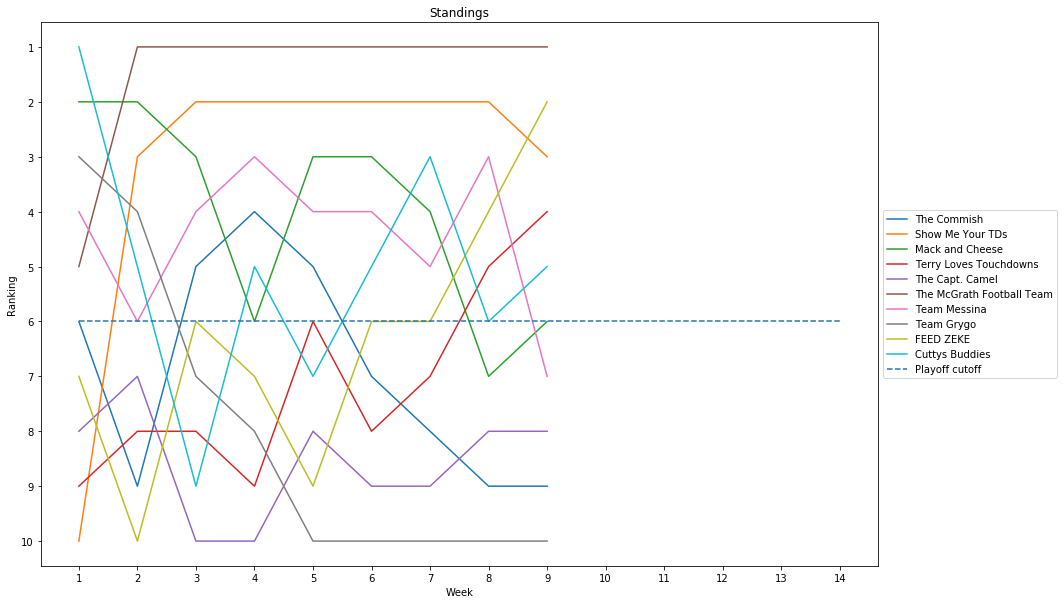

In [16]:

  
# create data
weeks = list(range(1,num_reg_season_wks+1))
numWeeks = num_reg_season_wks
plt.gca().invert_yaxis()
plt.rcParams['figure.figsize'] = [15, 10]
for index, row in standings_df.iterrows():
    ranking = []
    for i in range(1,numWeeks + 1):
        week_name = 'Week ' + str(i)
        ranking.append(row[week_name])
    plt.plot(weeks, ranking, label = row['Team'], linestyle="-")

plt.xticks(np.arange(min(weeks), max(weeks)+1, 1.0))
#TODO: Parameterize num of teams
plt.yticks(np.arange(1, 11, 1.0))
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Standings")
plt.xlabel("Week")
plt.ylabel("Ranking")
plt.plot(weeks, [6] * numWeeks, label = 'Playoff cutoff', linestyle="--")
pic_file_name = str(league_id) + '-' + str(year)+ "-"  + str(final_week) + '-standings.png'
plt.savefig("C:\\Users\\sando\\Documents\\python_projects\\ff\\" + pic_file_name)
plt.show()